In [1]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_model = pd.read_csv('C:/Users/USER/Dwi/dataset/datamaster-real.csv')
df_model

,id_student,code_module,gender,disability,final_result,score,assessment_type,activity_type,total_activities,sum_click,total_interaction
0,11391,AAA,M,N,Pass,82.0,TMA,resource,9,16,3555
1,11391,AAA,M,N,Pass,82.0,TMA,resource,9,44,3555
2,11391,AAA,M,N,Pass,82.0,TMA,resource,9,1,3555
3,11391,AAA,M,N,Pass,82.0,TMA,resource,9,2,3555
4,11391,AAA,M,N,Pass,82.0,TMA,resource,9,7,3555
...,...,...,...,...,...,...,...,...,...,...,...
1017958,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,1,378
1017959,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,4,378
1017960,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,2,378
1017961,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,6,378


In [4]:
df_model = df_model.drop('id_student', axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017963 entries, 0 to 1017962
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code_module        1017963 non-null  object 
 1   gender             1017963 non-null  object 
 2   disability         1017963 non-null  object 
 3   final_result       1017963 non-null  object 
 4   score              1017963 non-null  float64
 5   assessment_type    1017963 non-null  object 
 6   activity_type      1017963 non-null  object 
 7   total_activities   1017963 non-null  int64  
 8   sum_click          1017963 non-null  int64  
 9   total_interaction  1017963 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 77.7+ MB


In [5]:
# Get the position of categorical columns
catColumnsPos = [df_model.columns.get_loc(col) for col in list(df_model.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_model.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['code_module', 'gender', 'disability', 'final_result', 'assessment_type', 'activity_type']
Categorical columns position  : [0, 1, 2, 3, 5, 6]


In [6]:
# Get the position of numerical columns
numColumnsPos = [df_model.columns.get_loc(col) for col in list(df_model.select_dtypes('int64').columns)]
print('numerical columns           : {}'.format(list(df_model.select_dtypes('int64').columns)))
print('numerical columns position  : {}'.format(numColumnsPos))

numerical columns           : ['total_activities', 'sum_click', 'total_interaction']
numerical columns position  : [7, 8, 9]


## Elbow & KneeLocator

In [12]:
cost = {}
for k in tqdm(range(1, 10)):
    kproto = KPrototypes(n_clusters = k, init = 'Cao', n_jobs = 4, verbose = 2, random_state = 0)
    res = kproto.fit_predict(df_model, categorical = catColumnsPos)
    cost[k] = kproto.cost_

print("cost (sum distance) for all k:")
_ = [print(k,":",f'{v:.3f}') for k, v in cost.items()]

  0%|          | 0/9 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
cost (sum distance) for all k:
1 : 942228990704124.750
2 : 499265954346330.938
3 : 209956000089344.406
4 : 972578434

Text(0, 0.5, 'cost')

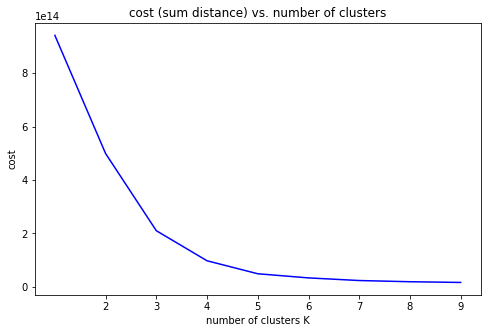

In [13]:
# scree plot: look for elbow
plt.figure(figsize=[8,5])
plt.plot(cost.keys(), cost.values(), color="blue")
plt.title("cost (sum distance) vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("cost")

In [14]:
# Confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees

cost_knee = KneeLocator(
        x=list(cost.keys()), 
        y=list(cost.values()), 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost = cost_knee.elbow   
print("Elbow at k =", f'{K_cost:.0f} clusters')

Elbow at k = 3 clusters


## Data Normalization

In [2]:
df_scale = pd.read_csv('C:/Users/USER/Dwi/dataset/datamaster-edit.csv')
df_scale

,Unnamed: 0,code_module,gender,disability,final_result,assessment_type,activity_type,score,total_activities,sum_click,total_interaction
0,0,0,1,0,1,1,16,0.800288,-2.030361,-0.165894,-0.698245
1,1,0,1,0,1,1,16,0.800288,-2.030361,0.572853,-0.698245
2,2,0,1,0,1,1,16,0.800288,-2.030361,-0.561651,-0.698245
3,3,0,1,0,1,1,16,0.800288,-2.030361,-0.535267,-0.698245
4,4,0,1,0,1,1,16,0.800288,-2.030361,-0.403348,-0.698245
...,...,...,...,...,...,...,...,...,...,...,...
1017958,1017958,6,1,0,0,1,5,0.197043,-1.477412,-0.561651,-0.802672
1017959,1017959,6,1,0,0,1,5,0.197043,-1.477412,-0.482500,-0.802672
1017960,1017960,6,1,0,0,1,5,0.197043,-1.477412,-0.535267,-0.802672
1017961,1017961,6,1,0,0,1,5,0.197043,-1.477412,-0.429732,-0.802672


In [3]:
df_scale = df_scale.drop('Unnamed: 0', axis=1)
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017963 entries, 0 to 1017962
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code_module        1017963 non-null  int64  
 1   gender             1017963 non-null  int64  
 2   disability         1017963 non-null  int64  
 3   final_result       1017963 non-null  int64  
 4   assessment_type    1017963 non-null  int64  
 5   activity_type      1017963 non-null  int64  
 6   score              1017963 non-null  float64
 7   total_activities   1017963 non-null  float64
 8   sum_click          1017963 non-null  float64
 9   total_interaction  1017963 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 77.7 MB


In [4]:
cluster_columns = ['code_module', 'gender', 'disability', 'final_result', 'assessment_type', 'activity_type', 'score', 'total_activities', 'sum_click', 'total_interaction']
df_scale = df_scale[cluster_columns]

In [5]:
# define numerical and categorical columns
numerical_columns = ['score', 'total_activities', 'sum_click', 'total_interaction']
categorical_columns = ['code_module', 'gender', 'disability', 'final_result', 'assessment_type', 'activity_type']

In [6]:
df_scale.head()

,code_module,gender,disability,final_result,assessment_type,activity_type,score,total_activities,sum_click,total_interaction
0,0,1,0,1,1,16,0.800288,-2.030361,-0.165894,-0.698245
1,0,1,0,1,1,16,0.800288,-2.030361,0.572853,-0.698245
2,0,1,0,1,1,16,0.800288,-2.030361,-0.561651,-0.698245
3,0,1,0,1,1,16,0.800288,-2.030361,-0.535267,-0.698245
4,0,1,0,1,1,16,0.800288,-2.030361,-0.403348,-0.698245


In [7]:
categorical_indexes = []
for c in categorical_columns:
    categorical_indexes.append(df_scale.columns.get_loc(c))
categorical_indexes

[0, 1, 2, 3, 4, 5]

## Silhouette Coefficient

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


Text(0, 0.5, 'score')

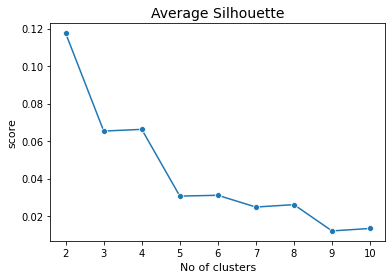

In [14]:
num_clusters = list(range(2, 11))
silhouette_avg = []
# calculate average silhouette score for each number of cluster (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters = k, init = 'Cao', n_jobs = 4, verbose = 2, random_state = 0)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))
    
# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('score', fontsize=11)

## Silhouette V1

In [30]:
from sklearn.metrics import silhouette_score
silhouette_avg = {}
for k in tqdm(range(2, 11)):
    kproto = KPrototypes(n_clusters = k, init = 'Cao', n_jobs = 4, verbose = 2, random_state = 0)
    res = kproto.fit_predict(df_scale, categorical = categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg[k] = silhouette_score(df_scale, cluster_labels)

  0%|          | 0/9 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


In [31]:
print("average silhouette for all k:")
_ = [print(k,":",f'{v:.3f}') for k, v in silhouette_avg.items()]

average silhouette for all k:
2 : 0.117
3 : 0.065
4 : 0.066
5 : 0.031
6 : 0.031
7 : 0.025
8 : 0.026
9 : 0.012
10 : 0.013


Text(0, 0.5, 'average silhouette')

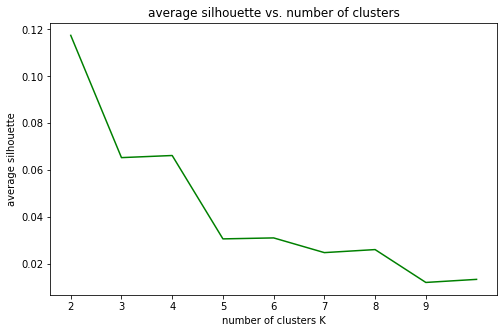

In [32]:
# scree plot: look for silhouette
plt.figure(figsize=[8,5])
plt.plot(silhouette_avg.keys(), silhouette_avg.values(), color="green")
plt.title("average silhouette vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("average silhouette")

## Silhouette V3

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = {}
for k in tqdm(range(2, 8)):
    kproto = KPrototypes(n_clusters = k, init = 'Huang', n_init = 25, random_state=42)
    res = kproto.fit_predict(df_scale, categorical = categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg[k] = silhouette_score(df_scale, cluster_labels)

print("average silhouette for all k:")
_ = [print(k,":",f'{v:.3f}') for k, v in silhouette_avg.items()]

# scree plot: look for silhouette
plt.figure(figsize=[8,5])
plt.plot(silhouette_avg.keys(), silhouette_avg.values(), color="green")
plt.title("average silhouette vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("average silhouette")

  0%|          | 0/6 [00:00<?, ?it/s]